3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

4. At the bottom of your imports cell, use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [3]:
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

    Take a look at the first 10 rows.
    Look at the last 5 rows. Do you see a problem?
    Redo the read_csv() call to correct this issue - do not modify the original csv file

In [26]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [27]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [28]:
gdp_df[:9]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN


In [29]:
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [30]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [31]:
gdp_df.drop(index=[6729,6730])

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
...,...,...,...,...
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN


In [32]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)

<ipython-input-32-c5e928b73d2e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)


In [33]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [147]:
gdp_df.drop(columns='Value Footnotes')

KeyError: "['Value Footnotes'] not found in axis"

In [37]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [43]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [148]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834




7.How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.


In [44]:
gdp_df.shape

(6729, 3)

In [45]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


8. 

Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?


In [55]:
gdp_df['Year'].min()

1990

In [56]:
gdp_df['Year'].max()

2018

In [64]:
print(gdp_df['Year'])

0       2018
1       2017
2       2016
3       2015
4       2014
        ... 
6724    1994
6725    1993
6726    1992
6727    1991
6728    1990
Name: Year, Length: 6729, dtype: int64


In [65]:
gdp_df.groupby(['Year']).size()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
dtype: int64

the number of countries involved was much lower in 1990 than the mid 200s and dropped significantly from 2017-2018

9. 

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [88]:
gdp_df.groupby(['Country']).size()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Length: 243, dtype: int64

In [89]:
country = gdp_df.groupby(['Country']).size().reset_index(name='Counts')

In [93]:
country.sort_values('Counts')

,Country,Counts
51,Djibouti,1
199,South Sudan,8
225,Turks and Caicos Islands,8
191,Sint Maarten (Dutch part),9
153,Nauru,12
...,...,...
91,IBRD only,29
92,IDA & IBRD total,29
93,IDA blend,29
130,"Macao SAR, China",29


there are 243 countries represented. the lesser counted countries might not have been recognized or a part of the UN. they also could have only been countries for a short time before either breaking up or being merged into another existing country



10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.


In [95]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [96]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. 

Use .describe() to find the summary statistics for GDP per capita in 2014.


In [99]:
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64



12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?


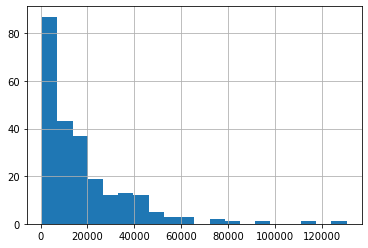

In [153]:
gdp_2014['GDP_Per_Capita'].hist(bins=20)

the distribution of this chart is right leaning.



13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.


In [112]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329
...,...,...,...
3697,Malawi,2014,1142.530804
4414,Niger,2014,900.136918
1375,Dem. Rep. Congo,2014,784.872656
794,Burundi,2014,768.469837


top 5 GDP countries: China, Qatar, Luxembourg, Singapore, Brunei

bottom 5 GDP countries: Malawi, Niger, Dem. Rep. Congo, Burundi, Central African Republic

14. 

Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


In [122]:
gdp_pivoted = gdp_df.pivot_table(values='GDP_Per_Capita',index='Country',columns='Year',dropna=True)

In [123]:
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896


In [125]:
gdp_pivoted[1990]

Country
Afghanistan                     NaN
Albania                 4458.247115
Algeria                10300.015042
Angola                  4761.229638
Antigua and Barbuda    17454.549799
                           ...     
West Bank and Gaza              NaN
World                   8966.014072
Yemen                   3425.707169
Zambia                  2339.137959
Zimbabwe                2819.549467
Name: 1990, Length: 243, dtype: float64

In [127]:
gdp_pivoted = gdp_pivoted[[1990,2017]]

In [128]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562


In [130]:
gdp_pivoted = gdp_pivoted.dropna()

15. 

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.


In [135]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[1990]



16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?


In [146]:
gdp_pivoted[gdp_pivoted['Percent_Change']<0].count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64